# Mājas darbs 1 - Nelineāro vienādojumu saknes

Lielgabala lode tiek izšauta no zemes leņķī $𝜃$ ar sākuma ātrumu $v_0$. Lielgabala lodes augstumu $h(t)$ jebkurā brīdī $t$ var modelēt ar šādu vienādojumu, pieņemot, ka nav gaisa pretestības:

$$ h(t) = v_0 sin(θ)t - \frac{1}{2}gt^2 $$

Kur:
* $g$ — brīvas krišanas paātrinājums, $g = 9,81 m/s^2$
* $θ$ - ir leņķis grādos
* $v_0$ - ir sākotnējais ātrums, metros sekundē.

Varianti:

1. Bisection, $v_0=50m/s$, $θ = 45°$, $H = 30m$
2. False-Position, $v_0=60m/s$, $θ = 30°$, $H = 30m$
3. Secant method, $v_0=50m/s$, $θ = 55°$, $H = 50m$

1.1. Definēt funkciju $h(t)$ un attēlot lodes augstuma izmaiņu laikā attiecībā pret zemi.

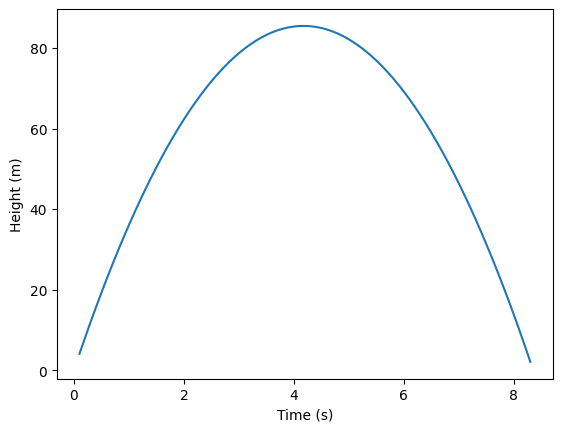

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Nodefinēju konstantus mainīgos, kas ir doti priekš variantiem, jo nezināju kuru variantu pildīt
V_ZERO = 50
ANGLE_THETA = math.radians(55)
GRAVITY = 9.81
HEIGHT = 50

# Izveidoju funkciju h(t), kas veidota pēc augšā dotās formulas
def h(t):
    return V_ZERO * math.sin(ANGLE_THETA) * t - 0.5 * GRAVITY * t ** 2

# Izveidoju numpy array ar vērtībām 0 līdz 10 ar soli 0.1
x_points = np.arange(0.0, 10.0, 0.1)

# Aprēķinu visas augstuma vērtības, izmantojot vektorizētu funkciju
y_points = h(x_points)

# Filtrēju x un y vērtības, lai iekļautu tikai tās vērtības, kas ir virs zemes jeb y vērtības, kas ir lielākas par 0
mask = y_points > 0
x_points_valid = x_points[mask]
y_points_valid = y_points[mask]

# Izveidoju plot ar punktiem
plt.plot(x_points_valid, y_points_valid)
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.show()


1.2. Noskaidrot kopējo laiku $T$, ko lode pavada gaisā.

In [13]:
def bisection(f, a, b, es = 0.00001):
    i = 0
    while abs(b - a) > es:
        c = (a + b) / 2
        fc = f(c)

        if f(a) * fc < 0:
            b = c
        else:
            a = c
        print("i=",i,"a=",a,"b=",b,"c=",c,"h(c)=", fc)
        i = i + 1
    return a

a = bisection(h, -10, 10)
print(f"Kopējais gaisā pavadītais laiks: {a:.2f}s")

i= 0 a= 0.0 b= 10 c= 0.0 h(c)= 0.0
i= 1 a= 5.0 b= 10 c= 5.0 h(c)= 82.16301107224794
i= 2 a= 7.5 b= 10 c= 7.5 h(c)= 31.275766608371896
i= 3 a= 7.5 b= 8.75 c= 8.75 h(c)= -17.16004312356614
i= 4 a= 8.125 b= 8.75 c= 8.125 h(c)= 8.973877367402906
i= 5 a= 8.125 b= 8.4375 c= 8.4375 h(c)= -3.6140789718315887
i= 6 a= 8.28125 b= 8.4375 c= 8.28125 h(c)= 2.7996501743481303
i= 7 a= 8.28125 b= 8.359375 c= 8.359375 h(c)= -0.3772766546011326
i= 8 a= 8.3203125 b= 8.359375 c= 8.3203125 h(c)= 1.2186711959086551
i= 9 a= 8.33984375 b= 8.359375 c= 8.33984375 h(c)= 0.42256837966255034
i= 10 a= 8.349609375 b= 8.359375 c= 8.349609375 h(c)= 0.02311363978293457
i= 11 a= 8.349609375 b= 8.3544921875 c= 8.3544921875 h(c)= -0.17696456309602127
i= 12 a= 8.349609375 b= 8.35205078125 c= 8.35205078125 h(c)= -0.07689622557830944
i= 13 a= 8.349609375 b= 8.350830078125 c= 8.350830078125 h(c)= -0.026883983878121853
i= 14 a= 8.349609375 b= 8.3502197265625 c= 8.3502197265625 h(c)= -0.0018833447927022462
i= 15 a= 8.34991455078

1.3. Atrast laika mirkli $t$, pie kura lode attrodas $H$ metrus virs zemes.

In [25]:
def time_h(t):
    return V_ZERO * math.sin(ANGLE_THETA) * t - 1 / 2 * GRAVITY * t ** 2 - HEIGHT
a = bisection(time_h, -10, 10)
b = bisection(time_h, 5, 10)
print(a, b)

i= 0 a= 0.0 b= 10 c= 0.0 h(c)= -50.0
i= 1 a= 0.0 b= 5.0 c= 5.0 h(c)= 32.16301107224794
i= 2 a= 0.0 b= 2.5 c= 2.5 h(c)= 21.73775553612397
i= 3 a= 1.25 b= 2.5 c= 1.25 h(c)= -6.467059731938015
i= 4 a= 1.25 b= 1.875 c= 1.875 h(c)= 9.551363527092974
i= 5 a= 1.25 b= 1.5625 c= 1.5625 h(c)= 2.021155803827476
i= 6 a= 1.40625 b= 1.5625 c= 1.40625 h(c)= -2.1032009874927695
i= 7 a= 1.484375 b= 1.5625 c= 1.484375 h(c)= -0.01108484769201823
i= 8 a= 1.484375 b= 1.5234375 c= 1.5234375 h(c)= 1.0125199141028887
i= 9 a= 1.484375 b= 1.50390625 c= 1.50390625 h(c)= 0.5025886422142207
i= 10 a= 1.484375 b= 1.494140625 c= 1.494140625 h(c)= 0.24621967451329851
i= 11 a= 1.484375 b= 1.4892578125 c= 1.4892578125 h(c)= 0.11768435772368946
i= 12 a= 1.484375 b= 1.48681640625 c= 1.48681640625 h(c)= 0.053328991094097944
i= 13 a= 1.484375 b= 1.485595703125 c= 1.485595703125 h(c)= 0.021129380720601887
i= 14 a= 1.484375 b= 1.4849853515625 c= 1.4849853515625 h(c)= 0.005024093769186777
i= 15 a= 1.48468017578125 b= 1.4849853

1.4. Atrast maksimālo sasniegto augstumu $H_{max}$

https://en.wikipedia.org/wiki/Projectile_motion arī šeit atradu formulu, kas aprēķina maksimālo lodes augstumu:
$$ h = \frac{v_0^2sin^2(θ)}{2|g|} $$

In [34]:
def v(t):
    return v0 * np.sin(theta_rad) / g

a = bisection(v, -10, 10)
print(a)

i= 0 a= 0.0 b= 10 c= 0.0 h(c)= 3.6040100977907614
i= 1 a= 5.0 b= 10 c= 5.0 h(c)= 3.6040100977907614
i= 2 a= 7.5 b= 10 c= 7.5 h(c)= 3.6040100977907614
i= 3 a= 8.75 b= 10 c= 8.75 h(c)= 3.6040100977907614
i= 4 a= 9.375 b= 10 c= 9.375 h(c)= 3.6040100977907614
i= 5 a= 9.6875 b= 10 c= 9.6875 h(c)= 3.6040100977907614
i= 6 a= 9.84375 b= 10 c= 9.84375 h(c)= 3.6040100977907614
i= 7 a= 9.921875 b= 10 c= 9.921875 h(c)= 3.6040100977907614
i= 8 a= 9.9609375 b= 10 c= 9.9609375 h(c)= 3.6040100977907614
i= 9 a= 9.98046875 b= 10 c= 9.98046875 h(c)= 3.6040100977907614
i= 10 a= 9.990234375 b= 10 c= 9.990234375 h(c)= 3.6040100977907614
i= 11 a= 9.9951171875 b= 10 c= 9.9951171875 h(c)= 3.6040100977907614
i= 12 a= 9.99755859375 b= 10 c= 9.99755859375 h(c)= 3.6040100977907614
i= 13 a= 9.998779296875 b= 10 c= 9.998779296875 h(c)= 3.6040100977907614
i= 14 a= 9.9993896484375 b= 10 c= 9.9993896484375 h(c)= 3.6040100977907614
i= 15 a= 9.99969482421875 b= 10 c= 9.99969482421875 h(c)= 3.6040100977907614
i= 16 a= 9.9